**Dataset Collection**

Due to Zomato API Basic Plan restriction, we cannot collect enough data for analysis. 

To overcome this problem ‘Zomato.csv’ file is provided to analyse the data deeply and to get useful inference.

Download [dataset](https://drive.google.com/file/d/1FSa_x3COvCoMODa44qXufO9CQb3ydqKw/view?usp=sharing)

Details of zomato.csv -

1.**Restaurant Id** : Unique id of every restaurant across various cities of the world

2.**Restaurant Name** : Name of the restaurant

3.**Country Code** : Country in which restaurant is located

4.**City** : City in which restaurant is located

5.**Address** : Address of the restaurant

6.**Locality** : Location in the city

7.**Locality Verbose** : Detailed description of the locality

8.**Longitude** : Longitude coordinate of the restaurant's location

9.**Latitude** : Latitude coordinate of the restaurant's location

10.**Cuisines** : Cuisines offered by the restaurant

11.**Average Cost for two** : Cost for two people in different 
currencies

12.**Currency** : Currency of the country

13.**Has Table booking** : yes/no

14.**Has Online delivery** : yes/ no

15.**Is delivering** : yes/ no

16.**Switch to order menu** : yes/no

17.**Price range** : range of price of food

18.**Aggregate Rating** : Average rating out of 5

19.**Rating color** : depending upon the average rating color

20.**Rating text** : text on the basis of rating of rating

21.**Votes** : Number of ratings casted by people


**Country Code** [link](https://drive.google.com/file/d/1fyTvbOstOtl227GQ34Rww0R-VsqBhIW4/view?usp=sharing)





**Dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the "Zomato.csv" file and making a copy of that in variable named "df" :
zomato = pd.read_csv("/content/zomato.csv",encoding='ISO-8859-1')
df = zomato.copy()
print(df.head())

   Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]


The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in ***New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR***. Doing this would make our analysis turn toward ***Delhi-NCR v Rest of India***.

**1.Bar graph of number of restaurants present in Delhi NCR vs Rest of India**

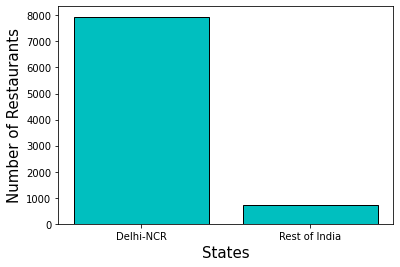

Delhi-NCR 7947
Rest of India 705


In [3]:
# Selecting the country "India" using country code as 1 
df = df[df['Country Code'] == 1]

# I have created a list of cities which we have to named as Delhi-NCR

lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
    
# Here i have replaced the city names which are not in Delhi-NCR as Rest of India     
for i in df.City:
    if i != "Delhi-NCR":
        df.City.replace(i,"Rest of India",inplace=True)

# Using value_counts() we get the dictionary containing counts of each cities
# Using this dictionary i am extracting the city name and their counts with help values() function

count_del = df.City.value_counts().values[0]
count_roi = df.City.value_counts().values[1]

# Graph plotting :
# plotted the graph between Delhi-NCR and Rest of India counts

plt.bar(["Delhi-NCR","Rest of India"],[count_del,count_roi],edgecolor ='black',color = 'c')
plt.xlabel("States",fontsize = 15)
plt.ylabel("Number of Restaurants",fontsize = 15)
plt.show()
print('Delhi-NCR',count_del)
print('Rest of India',count_roi)

**2.Cuisines which are not present in restaurant of Delhi NCR but present in rest of India**

In [4]:
# Cleaning all the null values using notnull() and keeping all the non null values in the dataframe

df=df.loc[df.Cuisines.notnull()]
# I have created this list to append all the cuisines in delhi according to dataset
delhi_ncr=[] 
for i in df.loc[df['City']=='Delhi-NCR','Cuisines']:
    for j in i.split(','):
        delhi_ncr.append(j.strip())
# For getting only unique cuisines present in delhi, i am using set() here        

delhi_ncr=set(delhi_ncr)

# I have created a list corresponding to the cuisines present in Rest of India and append only those cuisines in Rest of India

other_states=[]
for i in df.loc[df['City']!='Delhi-NCR','Cuisines']:
    if i!=np.nan:
        for j in i.split(','):
            other_states.append(j.strip())

# For getting only unique cuisines present in delhi, i am using set() here        
            
other_states=set(other_states)

#subtracting these will give me the cuisines which are present in all the other parts of india except new delhi.

non_delhi_ncr =other_states-delhi_ncr  
non_delhi_ncr
#according to the dataset these cuisines are not present in delhi.

{'BBQ', 'Cajun', 'German', 'Malwani'}

**3.Top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India** 

In [5]:
# print(df)
df = zomato.copy()
df = df[df['Country Code'] == 1]
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
df = df[df["Country Code"] == 1]

# I have taken care of that there is no null value of cuisines there
df=df.loc[df.Cuisines.notnull()]
df=df.loc[df['City']=='Delhi-NCR']
# print(df)
# creating list of all cuisines in delhi ncr only    
cuisines_del = []
for i in df.Cuisines:
    for j in i.split(','):
        cuisines_del.append(j.strip())

# I have created this dictionary because here i will save the no. of restaurants serving a perticular cuisinie in delhi NCR
dic_delhi=dict() 
for i in cuisines_del:
    if i in dic_delhi.keys():
        dic_delhi[i]+=1
    else:
        dic_delhi[i]=1
        
# Now i am sorting the dictionary on the basis value of dict in descending manner

a = sorted(dic_delhi.items(), key=lambda x: x[1],reverse = True)

print("-------------------------------------------------------------------------------------")
print("The following cuisines are corresponding to the restaurants in Delhi-NCR:")
print("-------------------------------------------------------------------------------------")

for i in range(10):
    print(a[i][0],a[i][1])

print("-----------------------------------------------------------------------------------------")


df = zomato.copy()
df = df[df['Country Code'] == 1]
lst=['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad', 'Delhi-NCR']
for i in lst:
    df.loc[df['City']==i, 'City']='Delhi-NCR'
    
cuisines_del = []

# I have taken care of that there is no null value of cuisines there and city should not be from Delhi-NCR

df=df.loc[df.Cuisines.notnull()]
df=df.loc[df['City']!='Delhi-NCR']
for i in df.Cuisines:
    for j in i.split(','):
        cuisines_del.append(j.strip()) 

# I have created this dictionary because here i will save the no. of restaurants serving a perticular cuisinie in delhi NCR        
dic_other =dict()
for i in cuisines_del:
    if i in dic_other.keys():
        dic_other[i]+=1
    else:
        dic_other[i]=1

# Now i am sorting the dictionary on the basis value of dict in descending manner

a = sorted(dic_other.items(), key=lambda x: x[1],reverse = True)
print("The following cuisines are corresponding to the restaurants which are not in Delhi-NCR:")
print("-----------------------------------------------------------------------------------------")

for j in range(10):
    print(a[j][0],a[j][1])

-------------------------------------------------------------------------------------
The following cuisines are corresponding to the restaurants in Delhi-NCR:
-------------------------------------------------------------------------------------
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
-----------------------------------------------------------------------------------------
The following cuisines are corresponding to the restaurants which are not in Delhi-NCR:
-----------------------------------------------------------------------------------------
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


**4.Cuisines vs No. of Restaurants**

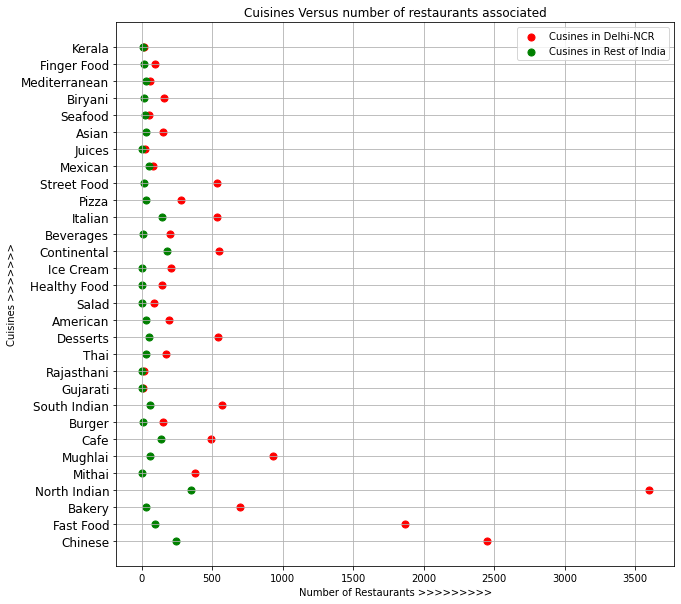

In [6]:
# Created 3 lists of cuisines count, cuisines of delhi, cuisines of rest of india

cuisine=[]
cus_delhi=[] 
cus_other=[] 

for i in dic_delhi.keys():
    if i in dic_other:
        cuisine.append(i)
        cus_delhi.append(dic_delhi[i])
        cus_other.append(dic_other[i])

# Graph plotting :
# For better visualization i am using scatter plot here 

plt.figure(figsize=(10,10))
plt.scatter(cus_delhi[0:30],cuisine[0:30],c='red',s=50)
plt.scatter(cus_other[0:30],cuisine[0:30],c='green',s=50)
plt.yticks(size=12)
plt.grid()
plt.xlabel('Number of Restaurants >>>>>>>>>')
plt.ylabel("Cuisines >>>>>>>")
plt.title('Cuisines Versus number of restaurants associated')
plt.legend(['Cusines in Delhi-NCR', 'Cusines in Rest of India'])
plt.show()

**Analysis :** From the above graph we can conclude that "North Indian" is the most popular with more than 3500 restaurants among Delhi-NCR as well as rest of India. Here, I have plotted only those 30 important cusinies which are common in both Delhi-NCR and other states for better analysis. There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cuisine we have chinese cusinie with 2448 restaurants in Delhi-NCR and 242 in Rest of India. After these two we have fast food with 1866 restaurants in Delhi-NCR and 97 in Rest of India (with a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the Rest of India and there are many more cusinies as show in the graph as shown. 

**5. a)Aggregate user rating with no. of votes**

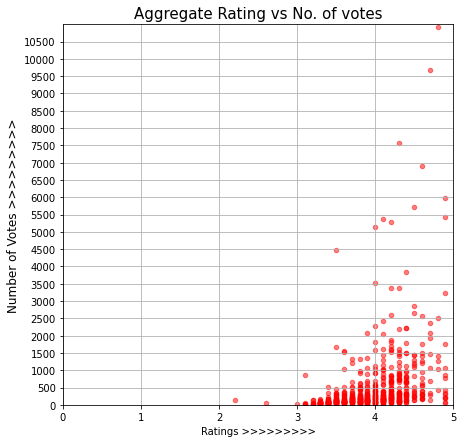

In [7]:
# Graph plotting :

plt.figure(figsize=(7,7))
plt.scatter(df['Aggregate rating'],df['Votes'], s=20,alpha=0.5,color = 'red')
plt.yticks(np.arange(0,11000,500))
plt.axis([0,5,0,11000])
plt.title("Aggregate Rating vs No. of votes",size = 15)
plt.xlabel("Ratings >>>>>>>>>")
plt.ylabel("Number of Votes >>>>>>>>>", size=12)

plt.grid()
plt.show()

**Analysis** :As the number votes increases the aggregate rating also increases for the restaurant. When the votes are less than 2000 there is a variation in the user ratings from 2 to 5, and when the votes are greater than 5000 there are high chance of getting the rating from 4 to 5.There are also some restaurants between 1000 to 2000 votes which has rating from 4 to 5.
Overall the analysis is that as the number votes increases the aggregate rating also increases for the restaurant.

**b)Aggregate user rating with no.of cuisines**

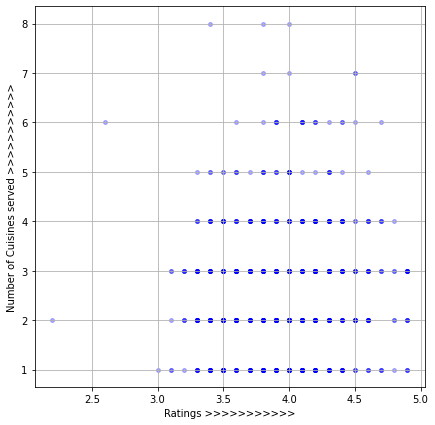

No. of cuisines served :  2 , No. of restaurants serving given number of cuisines :  207
No. of cuisines served :  1 , No. of restaurants serving given number of cuisines :  158
No. of cuisines served :  3 , No. of restaurants serving given number of cuisines :  180
No. of cuisines served :  4 , No. of restaurants serving given number of cuisines :  102
No. of cuisines served :  5 , No. of restaurants serving given number of cuisines :  31
No. of cuisines served :  6 , No. of restaurants serving given number of cuisines :  20
No. of cuisines served :  7 , No. of restaurants serving given number of cuisines :  4
No. of cuisines served :  8 , No. of restaurants serving given number of cuisines :  3


In [8]:
# I have taken care of that there is no null value of cuisines there

df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]

# Graph plotting :

plt.figure(figsize=(7,7))
plt.scatter(rating,cuisines,c='blue',s=15,alpha=0.3)
plt.xlabel('Ratings >>>>>>>>>>>')
plt.ylabel('Number of Cuisines served >>>>>>>>>>>')
plt.grid()
plt.show()

# created the list for the cuisines
dic=dict()

# Counting the no. of each cuisines
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("No. of cuisines served : ", i, ", No. of restaurants serving given number of cuisines : ", dic[i])


**Analysis** : From the graph it seems that providing more number of cuisines will not give much higher ratings to that particular restaurant.Here we can see that the restaurant providing 8 cuisines is not getting the higher rating where if we can see that the restaurant providing 1 or 2 cuisines is getting the average as well as higher rating too, In India, there are maximum no. of restaurants(207) that provides 2 cuisines and very few restaurants provides the 8 cuisines, seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. While restaurants providing less cuisines focus on the quality of food to get good aggregate user ratings.

**c)Aggregate user rating with average cost of restaurant**

<Figure size 504x504 with 0 Axes>

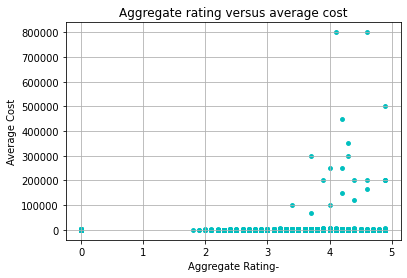

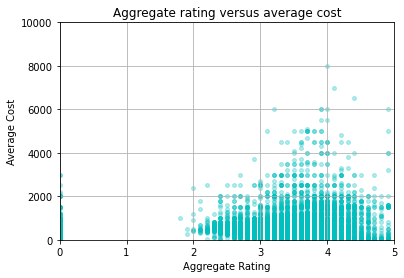

In [9]:
df=zomato.copy()
# Graph plotting :

plt.figure(figsize=(7, 7))
plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='c')
plt.grid()
plt.xlabel('Aggregate Rating-')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.subplots(0, 2)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='c', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 10000])
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost')
plt.title('Aggregate rating versus average cost')
plt.show()

**Analysis** :Here i have plotted the two subplots one with all the values of average cost and second with the average cost upto 10000.
In the first subplot it is observed that when the average cost is higher than 1 lakh rating is between 4 and 5.
For the second subplot there is a variation in rating when average cost is below the 2000 , rating varies from 2 to 5. And if the average cost is greater than 4000 rating varies from 3 to 5. If the average cost is in between 6000 and 8000 the rating is higher with 4 to 5, it seems like, the user is happy when average cost is between 6000 and 8000 with rating greater than 4.  

**6.Top 10 localities with more weighted restaurant rating**

Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


In [10]:
df=zomato.copy()

# Created 3 numpy arrays of aggregate rating,votes,locality

np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])

print('Localities | Weighted Rating ')
# Created the dictionry dic and calculated the weighted rating for each loaclity
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
# a = sorted(dic.items(), key=lambda x: x[1],reverse = True)

#numpy array of locality
np_local=np.array([i for i in dic.keys()])
#numpy array of weighted restaurant rating
np_wrr=np.array([i for i in dic.values()])
# sorted 
np_local=np_local[np.argsort(np_wrr)][::-1]
np_wrr=np.sort(np_wrr)[::-1]
for i in range(50):
    print(np_local[i],np_wrr[i])

Localities | Weighted Rating 
Penjaringan 4.9
West Park 4.9
Gíçvea 4.9
Cengkareng 4.9
Paia 4.9
Hotel Clarks Amer, Malviya Nagar 4.9
Setor De Clubes Esportivos Sul 4.9
City and Suburban 4.9
Marshalltown 4.9
Old Dutch Hospital, Fort 4.9
Fort Street 4.9
Pondok Aren 4.9
Windermere 4.9
New Tampa 4.9
Beak Street, Soho 4.9
Aminabad 4.9
DIFC 4.9
Venetian Village, Al Maqtaa 4.9
Taman Impian Jaya Ancol, Ancol 4.9
Bishopsgate, City Of London 4.9
Kenwood 4.9
The Milk District 4.9
Caddebostan 4.9
Barwa Towers, Al Sadd 4.9
Lexington Street, Soho 4.9
Nassima Royal Hotel, Trade Centre Area 4.9
Sofitel Philippine Plaza Manila, Pasay City 4.9
Bebek 4.9
Deira City Centre Area 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Muwailih Commercial 4.8
Century City Mall, Poblacion, Makati City 4.8
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Centro 4.8
Galeria River, Copacabana 4.8
UP Town Center, Diliman, Quezon City 4.8
Hotel Unique, Jardim Paulist

In [11]:
print("Top 10 localities with more weighted restaurant rating :")
print("--------------------------------------------------------")
for i in range(10):
    print(np_local[i])

Top 10 localities with more weighted restaurant rating :
--------------------------------------------------------
Penjaringan
West Park
Gíçvea
Cengkareng
Paia
Hotel Clarks Amer, Malviya Nagar
Setor De Clubes Esportivos Sul
City and Suburban
Marshalltown
Old Dutch Hospital, Fort


**7.Top 15 restaurants have a maximum number of outlets**

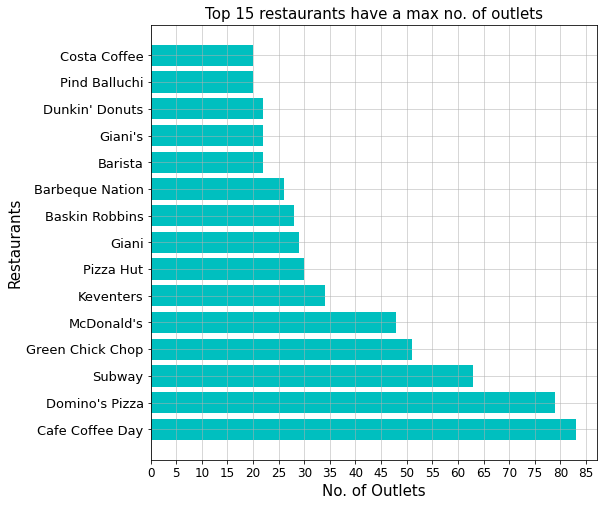

In [12]:
# Using the value_counts() method to find the count of each restaurant name and head(15) for top 15 only

a = df["Restaurant Name"].value_counts().head(15)
b = a.index
sizes = []
labels = []
for i in range(len(a)):
#     print(b[i],a[i])
    sizes.append(a[i])
    labels.append(b[i])
# print(sizes)

# Graph plotting :

plt.figure(figsize=(8,8))
plt.barh(labels,sizes,color = 'c')
plt.title("Top 15 restaurants have a max no. of outlets", fontsize =15)
plt.xlabel("No. of Outlets",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=13)
plt.grid(linewidth = 0.5)
plt.show()

**8.Histogram plot of aggregate rating of restaurant**

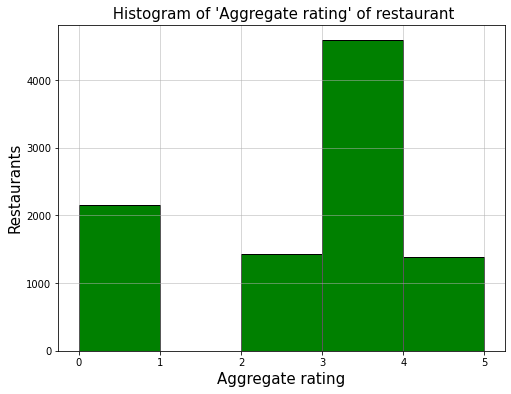

In [13]:
# Dropping the NA values from Aggregate rating column

rating = df["Aggregate rating"].dropna()

# Graph plotting :

plt.figure(figsize=(8,6))
plt.hist(rating,edgecolor = "black",color = "green",bins=range(6))
plt.title(" Histogram of 'Aggregate rating' of restaurant", fontsize =15)
plt.xlabel("Aggregate rating",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.grid(linewidth = 0.5)
plt.show()

**9.Bar graph top 10 restaurants in the data with the highest number of votes**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


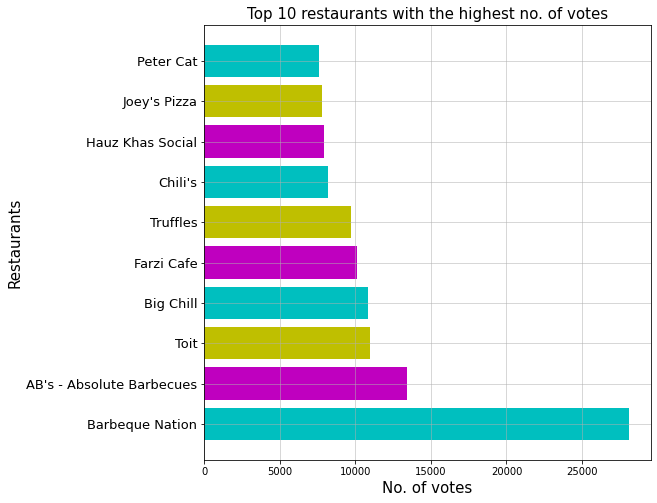

In [14]:

# Created two numpy arrays of votes and restaurants from the dataframe
np_restaurants=np.array([i for i in df['Restaurant Name']])
np_votes=np.array([i for i in df["Votes"]])

dic=dict()
# Summed up the number of votes of different restaurants in the dctionary
for i in range(len(np_restaurants)):
    if np_restaurants[i] in dic.keys():
        dic[np_restaurants[i]]+=np_votes[i]
    else:
        dic[np_restaurants[i]]=np_votes[i]
# sorted the dictionary with values
a = sorted(dic.items(), key=lambda x: x[1],reverse = True)
restaurant = []
votes = []

for i in range(10):
#     print(a[i][0],a[i][1])
    restaurant.append(a[i][0])
    votes.append(a[i][1])

# Graph Plotting :

plt.figure(figsize=(8,8))
plt.barh(restaurant,votes,color = 'cmy')
plt.title("Top 10 restaurants with the highest no. of votes", fontsize =15)
plt.xlabel("No. of votes",fontsize = 15)
plt.ylabel("Restaurants",fontsize = 15)
plt.yticks(size=13)

plt.grid(linewidth = 0.5)
plt.show()

**10.Pie graph of top 10 cuisines present in restaurants in the USA.**

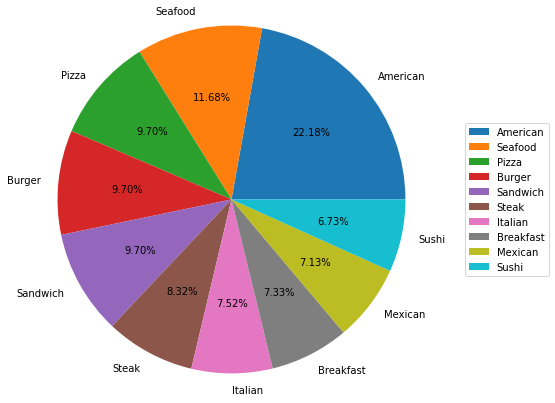

In [15]:
df = zomato.copy()

# I have used the country code of USA to get only data of country USA 

df = df[df["Country Code"] == 216]

#filtering and keeping all the non null values

df=df.loc[df['Cuisines'].notnull()]   

cuisine_usa = []
for i in df["Cuisines"]:
    for j in i.split(","):
        cuisine_usa.append(j.strip())

dic = dict()
for i in cuisine_usa:
    if i in dic.keys():
        dic[i]+=1
    else :
        dic[i]=1
#appended the values and keys of the dictionary in the numpy arrays  
np_cuisines=np.array([i for i in dic.keys()])
np_freq=np.array([i for i in dic.values()])

# sorted
np_cuisines=np_cuisines[np.argsort(np_freq)][::-1]
np_freq=np.sort(np_freq)[::-1]

# Graph plotting :
plt.pie(np_freq[0:10], labels=np_cuisines[0:10], radius=2, autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.55,0.5),loc = "center left")
plt.show()